<a href="https://colab.research.google.com/github/n-beckage/CS254_Final_Project/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

# TODO: Fill in the Google Drive path where you uploaded the assignment, it should be under CS254/CS254-Assignments/netid-A2
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS254/CS 254 Final Project/' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['nytcrosswords.csv', 'FeatureEngineering.ipynb']


# Features to Build
- Number of words in the clue
- Does clue contain pronoun?
- Weight letters in the clue by frequencey
  https://en.wikipedia.org/wiki/Letter_frequency
- Weights letter in answer by frequency 
- 

### Other tasks
- Figure out what day of the week each clue is from and filter the dataset to just be Sunday-Wednesday puzzle clues

### Labels
- Name of a person
- Too complicated without NLP (basically our 'other' category
- 



# Loading the Dataset
The dataset is located in our folder

In [3]:
df = pd.read_csv(GOOGLE_DRIVE_PATH+"nytcrosswords.csv", encoding="windows_1258")
df.head() #look at the first few rows

,Date,Word,Clue
0,10/31/2021,PAT,"Action done while saying ""Good dog"""
1,10/31/2021,RASCALS,Mischief-makers
2,10/31/2021,PEN,It might click for a writer
3,10/31/2021,SEP,Fall mo.
4,10/31/2021,ECO,Kind to Mother Nature


# Start of Feature Extraction + Engineering

---

HEY TEAM! Here's what I've done so far to code feature extraction, hope this is a good headstart! I also made an outline for next steps for reliminary results in text boxes below.
Message me with questions and lmk if you want to code more of it with me this weekend! 😀 - Anna Jane

In [4]:
# get given features from dataframe (feature extraction)
clues = np.asarray(df["Clue"], dtype=str)
answers = np.asarray(df["Word"], dtype=str)
# found an error:  when answer to a clue is "NULL" python replaces it with a NaN.
# here I find all instances where the answer was replaced with a NaN and restate 
# the answer to the clue as "NULL".
for i in np.argwhere(answers=="nan"):
    answers[i]="NULL"

dates = np.asarray(df["Date"])

In [5]:
# get day of the week from dates (getting targets/labels)
def get_days(dates):
    clue_days = []
    for i in range(len(dates)):
        month, day, year = (int(x) for x in dates[i].split('/'))   
        my_date = date(year, month, day)
        clue_days.append(my_date.strftime("%A"))  #'Wednesday'
    return np.array(clue_days)

# call function
clue_days = get_days(dates) 
# ^ ideally want to condense these to "puzzle_days" since each example we feed our classifier will be one puzzle

In [221]:
print(clue_days)

['Sunday' 'Sunday' 'Sunday' ... 'Sunday' 'Sunday' 'Sunday']


In [6]:
# (feature engineering)

# get clue lengths: number of characters (including punctuation) in clue
clue_lengths = np.empty(len(clues))
for i in range(len(clue_lengths)):
    clue_lengths[i] = len(clues[i])

# get answer lengths: number of characters (including punctuation) in answer
answer_lengths = np.empty(len(answers))
for i in range(len(answer_lengths)):
    answer_lengths[i] = len(answers[i])

## Making a list of puzzle objects

In [106]:
# puzzles: a list of all 10,207 puzzles. Each item in the list represents a puzzle. Each puzzle is a tuple in the format (dayOfWeek, clue-Answerpairs).
# Each clue-Answerpairs is a dictionary where the key is a list of clues, and the value is the corresponding (matching index) list of answers
# puzzles=[]
# for i in range(len(puzzle_groups)):
#   puz = puzzle_groups[i]
#   dayOfWeek = get_days(np.array(puz["Date"]))[0]
#   clueAnswerPair = dict(clues = list(puz["Clue"]), answers = list(puz["Word"]))
#   puzzles.append((dayOfWeek,clueAnswerPair))


In [107]:
# # HOW TO GET FIRST CLUE FROM FIRST PUZZLE
# list(puzzles[0][1].values())[0][0]

# # HOW TO GET FIRST ANSWER FROM FIRST PUZZLE
# list(puzzles[0][1].values())[1][0]

'STALK'

## Splitting the data into train/test data
Our simplest case model - simple SVM with 80% train 20% test

In [8]:
days = get_days(dates)
len(days)

781573

In [49]:
# putting the data into a nx3 arrray where n is the number of rows (781,573). Every time this cell is run the data is re-ordered
data_arr = np.empty((len(days),3), dtype=object)
for i in range(len(days)):
  data_arr[i][0] = clue_lengths[i]
  data_arr[i][1] = answer_lengths[i]
  data_arr[i][2] = days[i]

In [10]:
# # this is an inplace function to SHUFFLE DATA
# np.random.shuffle(data_arr)

In [50]:
def get_subset(data_array, size):
  return data_array[:size]

# getting the subset of our data (non-random, takes n frist values of data_arr)
subset = get_subset(data_arr, 1000)

# Training an SVM Classifier
After feature extraction/engineering and splitting up data into features for each puzzle, train an SVM on a small set of examples.

- Create an <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVC</a> object, imported from sklearn's svm module, use linear or poly kernel.
- Call the .fit() function on your model with x_train and y_train as parameters.
- Call the .predict() function on your model with x_test as a parameter and store the results.

In [73]:
# test_cell

# x_train, x_test, y_train, y_test = train_test_split(subset[:,0:2], subset[:,2], test_size = 0.20, random_state=0)
# supVect.fit(x_train, y_train)
# print(supVect.score(x_test,y_test))
# y_preds = supVect.predict(x_test)
# print(accuracy_score(y_test, y_preds))
# print(classification_report(y_test, y_preds))
len(list(range(1000, 10500, 500)))

19

In [117]:
import warnings
warnings.filterwarnings('ignore')
# TAKES ~5 MINUTES TO RUN - BUILDING MODELS
supVect = SVC(kernel = 'rbf') # this is the default kernel
test_errors = []
train_errors = []
test_reports = []
train_reports = []
iters = range(1000, 10250, 250)
for i in iters:
  np.random.shuffle(data_arr)
  subset = get_subset(data_arr, i)
  x_train, x_test, y_train, y_test = train_test_split(subset[:,0:2], subset[:,2], test_size = 0.20, random_state=0)
  supVect.fit(x_train, y_train)
  y_test_preds = supVect.predict(x_test)
  test_score = accuracy_score(y_test, y_test_preds)
  test_error = 1 - test_score
  test_errors.append(test_error)
  y_train_preds = supVect.predict(x_train)
  train_score = accuracy_score(y_train, y_train_preds)
  train_error = 1 - train_score
  train_errors.append(train_error)
  test_reports.append(classification_report(y_test, y_test_preds))
  train_reports.append(classification_report(y_train, y_train_preds))

### Summary Statistics for All Models

In [116]:
print("Number of models created:",len(iters))
print("Starting at m =",iters[0],"up to m =",iters[len(iters)-1],"at increments of",iters[1]-iters[0])
print("Average test error =",np.mean(test_errors))
print("Average test accuracy =",1-np.mean(test_errors))
print("Average training error =",np.mean(train_errors))
print("Average training accuracy =",1-np.mean(train_errors))

Number of models created: 37
Starting at m = 1000 up to m = 10000 at increments of 250
Average test error = 0.7600393206495822
Average test accuracy = 0.23996067935041776
Average training error = 0.7601782807762135
Average training accuracy = 0.23982171922378648


### Best SVM Model Statistics

In [100]:
best_idx = test_errors.index(min(test_errors))
print("Model with the highest test accuracy had M =",iters[best_idx])
print("Test error was",test_errors[best_idx])
print("Training error was",train_errors[best_idx])
print("\n TEST REPORT:")
print(test_reports[best_idx])
print("\n TRAINING REPORT:")
print(train_reports[best_idx])

Model with the highest test accuracy had M = 1000
Test error was 0.7
Training error was 0.75625

 TEST REPORT:
              precision    recall  f1-score   support

      Friday       0.00      0.00      0.00        22
      Monday       0.00      0.00      0.00        25
    Saturday       0.00      0.00      0.00        24
      Sunday       0.30      0.98      0.46        60
    Thursday       0.00      0.00      0.00        21
     Tuesday       0.00      0.00      0.00        17
   Wednesday       0.17      0.03      0.05        31

    accuracy                           0.30       200
   macro avg       0.07      0.15      0.07       200
weighted avg       0.12      0.30      0.15       200


 TRAINING REPORT:
              precision    recall  f1-score   support

      Friday       0.00      0.00      0.00       105
      Monday       0.00      0.00      0.00       129
    Saturday       0.00      0.00      0.00        82
      Sunday       0.25      0.98      0.39       191
  

### Worst SVM Model Statistics

In [101]:
worst_idx = test_errors.index(max(test_errors))
print("Model with the lowest test accuracy had M =",iters[worst_idx])
print("Test error was",test_errors[worst_idx])
print("Training error was",train_errors[worst_idx])
print("\n TEST REPORT:")
print(test_reports[worst_idx])
print("\n TRAINING REPORT:")
print(train_reports[worst_idx])

Model with the lowest test accuracy had M = 3000
Test error was 0.8049999999999999
Training error was 0.7566666666666666

 TEST REPORT:
              precision    recall  f1-score   support

      Friday       0.00      0.00      0.00        66
      Monday       0.00      0.00      0.00        78
    Saturday       0.00      0.00      0.00        70
      Sunday       0.20      1.00      0.33       117
    Thursday       0.00      0.00      0.00        98
     Tuesday       0.00      0.00      0.00        68
   Wednesday       0.00      0.00      0.00       103

    accuracy                           0.20       600
   macro avg       0.03      0.14      0.05       600
weighted avg       0.04      0.20      0.06       600


 TRAINING REPORT:
              precision    recall  f1-score   support

      Friday       0.00      0.00      0.00       267
      Monday       0.00      0.00      0.00       314
    Saturday       0.00      0.00      0.00       284
      Sunday       0.24      1.

In [111]:
# Counting the balance of our data
import collections
elements_count = collections.Counter(clue_days)
for key, value in elements_count.items():
   print(f"{key}: {round((value/len(clue_days))*100,1)}%")

Sunday: 23.8%
Saturday: 11.3%
Friday: 11.6%
Thursday: 12.9%
Wednesday: 13.3%
Tuesday: 13.5%
Monday: 13.7%


In [87]:
print(list(iters))
print(test_errors)

[1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, 9250, 9500, 9750, 10000]
[0.7, 0.78, 0.7633333333333333, 0.7514285714285714, 0.74, 0.76, 0.788, 0.7436363636363637, 0.8049999999999999, 0.7307692307692308, 0.7642857142857142, 0.768, 0.75875, 0.7388235294117647, 0.7577777777777778, 0.7652631578947369, 0.751, 0.7380952380952381, 0.7836363636363637, 0.7895652173913044, 0.7758333333333334, 0.7512, 0.7584615384615385, 0.7674074074074074, 0.7742857142857142, 0.7482758620689656, 0.7546666666666667, 0.7580645161290323, 0.76125, 0.7678787878787878, 0.7623529411764706, 0.7634285714285715, 0.7583333333333333, 0.7454054054054053, 0.7721052631578947, 0.7656410256410257, 0.7595000000000001]


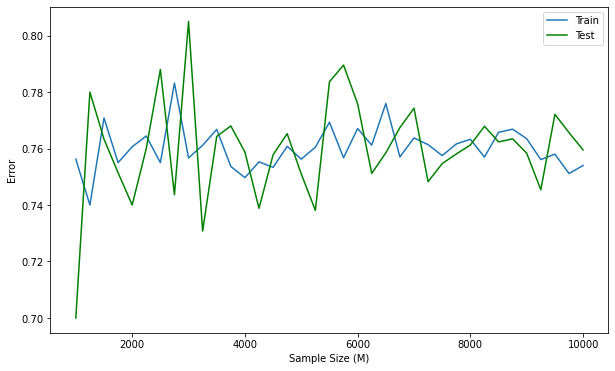

In [93]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(list(iters),train_errors)
plt.plot(list(iters),test_errors, color = "green")
plt.xlabel("Sample Size (M)")
plt.ylabel("Error")
plt.legend(["Train","Test"])

In [89]:
supVect.score(x_train,y_train)

0.246

# Testing the SVM Classifier
After training, test the classifier on a small testing set. 
Gauge performance based on TP, TN, FP, FN statistics (i.e. precision, recall, accuracy, etc...)